In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import urllib
import pprint
from tabulate import tabulate

%matplotlib inline

# Limit rows disp# Limit rows displayed in notebook
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 2)

In [2]:
def remove_outliers(df, col):
    new_df = df[np.abs(df[col]-df[col].mean())<=(3*df[col].std())]
    return new_df

def df_info(df, transpose):
    total_rows = df.shape[0]
    total_cols = df.shape[1]
    nan_df = pd.DataFrame(df.count(), columns=["# NaNs's"])
    nan_df["# NaNs's"] = nan_df["# NaNs's"].apply(lambda row: total_rows - row)
    print "Number of rows: %i" % total_rows
    print "Number of columns: %i" % total_cols
    print "Columns with NaN's: " + "None"
    if nan_df[nan_df["# NaNs's"]>0].empty:
        return
    if transpose:
        print nan_df[nan_df["# NaNs's"]>0].T
    else:
        print nan_df[nan_df["# NaNs's"]>0]
    return

def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [35]:

reviews = pd.read_pickle('review/restaurant_reviews_cleaned.pkl')

restaurants = pd.read_pickle('restaurant/cleaned_restaurant_dataset.pkl')
rest_ids = restaurants['business_id']


rest_reviews = pd.merge(left=pd.DataFrame(rest_ids), right=reviews, how='inner', left_on='business_id', right_on='business_id')

#serialize phoenix reviews for faster load next time
#rest_reviews.to_pickle('review/phoenix_reviews.pkl')
rest_reviews.head()



,business_id,review_id,date.year,date.month,date.day,stars,text,review_length,votes.cool,votes.funny,votes.useful,user_id
0,x5Mv61CnZLohZWxfCVCPTQ,4ibY4fPQYM7FBSVPrvrYvg,2010,4,2,4,Not the same Domino's pizza I ate too much of ...,375,0,0,0,t95D1tnWvAOy2sxXnI3GUA
1,x5Mv61CnZLohZWxfCVCPTQ,1JlopVxrAeDNQCRnSHLHrQ,2010,5,3,4,Easy ordering-on-line. Made exactly as I asked...,606,0,0,0,t95D1tnWvAOy2sxXnI3GUA
2,x5Mv61CnZLohZWxfCVCPTQ,9--jL__9efnmXZEm9o0HIw,2010,11,2,5,OK OK... as a Proud Italian I hope my momma do...,1722,5,4,4,9ellV9VrEOPA3vX2pZptSA
3,x5Mv61CnZLohZWxfCVCPTQ,TOZMdEyuVnLfkLt6rlxxGA,2011,6,17,2,"So Domino's is Domino's, right? You must know...",1457,1,2,2,UpcVov-qPEKJk6FXl3LLHA
4,x5Mv61CnZLohZWxfCVCPTQ,u-LEH9e8mWPVmolbsXb5rg,2012,9,4,3,never has crushed peppers! \n\nbut the pizza a...,60,0,1,1,NkxFV7RefN87jL_LeVlIPg


In [36]:
print 'Summary of All Phoenix Restaurant Reviews'
rest_reviews.describe()

Summary of All Phoenix Restaurant Reviews


,date.year,date.month,date.day,stars,review_length,votes.cool,votes.funny,votes.useful
count,349966.0,349966.0,349966.0,349966.0,349966.0,349966.0,349966.0,349966.0
mean,2012.2,6.5,15.7,3.8,622.5,0.6,0.5,1.1
std,1.8,3.4,8.8,1.3,584.4,1.6,1.5,2.0
min,2005.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
25%,2011.0,4.0,8.0,3.0,234.0,0.0,0.0,0.0
50%,2013.0,7.0,16.0,4.0,446.0,0.0,0.0,0.0
75%,2014.0,9.0,23.0,5.0,812.0,1.0,0.0,1.0
max,2015.0,12.0,31.0,5.0,5000.0,89.0,70.0,96.0


In [37]:
rest_reviews.head()

,business_id,review_id,date.year,date.month,date.day,stars,text,review_length,votes.cool,votes.funny,votes.useful,user_id
0,x5Mv61CnZLohZWxfCVCPTQ,4ibY4fPQYM7FBSVPrvrYvg,2010,4,2,4,Not the same Domino's pizza I ate too much of ...,375,0,0,0,t95D1tnWvAOy2sxXnI3GUA
1,x5Mv61CnZLohZWxfCVCPTQ,1JlopVxrAeDNQCRnSHLHrQ,2010,5,3,4,Easy ordering-on-line. Made exactly as I asked...,606,0,0,0,t95D1tnWvAOy2sxXnI3GUA
2,x5Mv61CnZLohZWxfCVCPTQ,9--jL__9efnmXZEm9o0HIw,2010,11,2,5,OK OK... as a Proud Italian I hope my momma do...,1722,5,4,4,9ellV9VrEOPA3vX2pZptSA
3,x5Mv61CnZLohZWxfCVCPTQ,TOZMdEyuVnLfkLt6rlxxGA,2011,6,17,2,"So Domino's is Domino's, right? You must know...",1457,1,2,2,UpcVov-qPEKJk6FXl3LLHA
4,x5Mv61CnZLohZWxfCVCPTQ,u-LEH9e8mWPVmolbsXb5rg,2012,9,4,3,never has crushed peppers! \n\nbut the pizza a...,60,0,1,1,NkxFV7RefN87jL_LeVlIPg


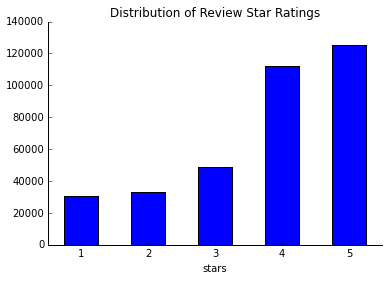

In [38]:
rest_reviews.groupby('stars').stars.count().plot(kind='bar', title='Distribution of Review Star Ratings', grid=False)
plt.setp(plt.xticks()[1], rotation=0)
remove_border()

In [39]:
rest_reviews.review_length.describe()


count    349966.0
mean        622.5
std         584.4
min           1.0
25%         234.0
50%         446.0
75%         812.0
max        5000.0
Name: review_length, dtype: float64

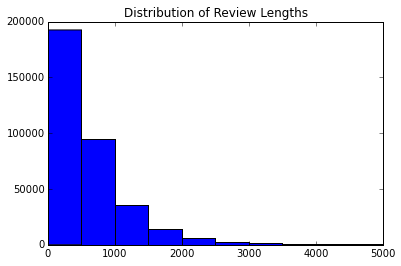

In [40]:
rest_reviews.review_length.hist(grid=False)
plt.title('Distribution of Review Lengths')

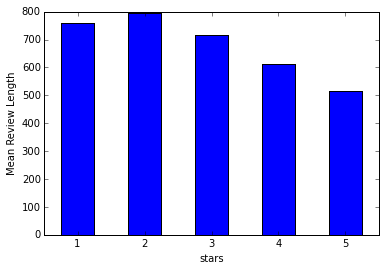

In [41]:
rest_reviews.groupby('stars').review_length.mean().plot(kind='bar', rot=0, grid=False)
plt.ylabel('Mean Review Length')

In [42]:
rest_review_lengths = rest_reviews[rest_reviews.columns[[0,1,7]]]
rest_review_lengths.head()

,business_id,review_id,review_length
0,x5Mv61CnZLohZWxfCVCPTQ,4ibY4fPQYM7FBSVPrvrYvg,375
1,x5Mv61CnZLohZWxfCVCPTQ,1JlopVxrAeDNQCRnSHLHrQ,606
2,x5Mv61CnZLohZWxfCVCPTQ,9--jL__9efnmXZEm9o0HIw,1722
3,x5Mv61CnZLohZWxfCVCPTQ,TOZMdEyuVnLfkLt6rlxxGA,1457
4,x5Mv61CnZLohZWxfCVCPTQ,u-LEH9e8mWPVmolbsXb5rg,60


In [43]:
rest_review_lengths.describe()

,review_length
count,349966.0
mean,622.5
std,584.4
min,1.0
25%,234.0
50%,446.0
75%,812.0
max,5000.0


In [44]:
rest_review_lengths = remove_outliers(rest_review_lengths, 'review_length')
rest_review_lengths.describe()

,review_length
count,343071.0
mean,572.7
std,461.4
min,1.0
25%,230.0
50%,436.0
75%,782.0
max,2375.0


In [45]:
rest_reviews = pd.merge(left=rest_reviews, right=rest_review_lengths, how='inner', left_on='review_id', right_on='review_id')
rest_reviews.describe()

,date.year,date.month,date.day,stars,review_length_x,votes.cool,votes.funny,votes.useful,review_length_y
count,343071.0,343071.0,343071.0,343071.0,343071.0,343071.0,343071.0,343071.0,343071.0
mean,2012.2,6.5,15.7,3.8,572.7,0.6,0.5,1.0,572.7
std,1.8,3.4,8.8,1.3,461.4,1.6,1.4,1.9,461.4
min,2005.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
25%,2011.0,4.0,8.0,3.0,230.0,0.0,0.0,0.0,230.0
50%,2013.0,7.0,16.0,4.0,436.0,0.0,0.0,0.0,436.0
75%,2014.0,9.0,23.0,5.0,782.0,1.0,0.0,1.0,782.0
max,2015.0,12.0,31.0,5.0,2375.0,89.0,70.0,96.0,2375.0


In [46]:
rest_reviews.head()

,business_id_x,review_id,date.year,date.month,date.day,stars,text,review_length_x,votes.cool,votes.funny,votes.useful,user_id,business_id_y,review_length_y
0,x5Mv61CnZLohZWxfCVCPTQ,4ibY4fPQYM7FBSVPrvrYvg,2010,4,2,4,Not the same Domino's pizza I ate too much of ...,375,0,0,0,t95D1tnWvAOy2sxXnI3GUA,x5Mv61CnZLohZWxfCVCPTQ,375
1,x5Mv61CnZLohZWxfCVCPTQ,1JlopVxrAeDNQCRnSHLHrQ,2010,5,3,4,Easy ordering-on-line. Made exactly as I asked...,606,0,0,0,t95D1tnWvAOy2sxXnI3GUA,x5Mv61CnZLohZWxfCVCPTQ,606
2,x5Mv61CnZLohZWxfCVCPTQ,9--jL__9efnmXZEm9o0HIw,2010,11,2,5,OK OK... as a Proud Italian I hope my momma do...,1722,5,4,4,9ellV9VrEOPA3vX2pZptSA,x5Mv61CnZLohZWxfCVCPTQ,1722
3,x5Mv61CnZLohZWxfCVCPTQ,TOZMdEyuVnLfkLt6rlxxGA,2011,6,17,2,"So Domino's is Domino's, right? You must know...",1457,1,2,2,UpcVov-qPEKJk6FXl3LLHA,x5Mv61CnZLohZWxfCVCPTQ,1457
4,x5Mv61CnZLohZWxfCVCPTQ,u-LEH9e8mWPVmolbsXb5rg,2012,9,4,3,never has crushed peppers! \n\nbut the pizza a...,60,0,1,1,NkxFV7RefN87jL_LeVlIPg,x5Mv61CnZLohZWxfCVCPTQ,60


In [47]:
rest_count_reviews = pd.DataFrame(rest_reviews.groupby('business_id_x').count('review_id')['review_id'])
rest_count_reviews.columns=['count_reviews']
rest_count_reviews.reset_index(level=0, inplace=True)
rest_count_reviews

,business_id_x,count_reviews
0,--5jkZ3-nUPZxUvtcbr8Uw,52
1,--BlvDO_RG2yElKu9XA1_g,74
2,-1bOb2izeJBZjHC7NWxiPA,83
3,-2gyHPSL8pJjkSe5Ozzw6Q,30
4,-3WVw1TNQbPBzaKCaQQ1AQ,237
5,-3frEL8Vo8kyq4kfgTn0GA,10
6,-3xbryp44xhpN4BohxXDdQ,139
7,-4A5xmN21zi_TXnUESauUQ,441
8,-4BtfPW3_v092G8pqHrv4w,10
9,-5rFC4EVrT-v8g1PSEf6Xg,65


In [48]:
rest_count_reviews.describe()

,count_reviews
count,5129.0
mean,66.9
std,91.3
min,1.0
25%,16.0
50%,39.0
75%,82.0
max,1268.0


In [49]:
# remove outliers from count_reviews
rest_count_reviews = remove_outliers(rest_count_reviews, 'count_reviews')
rest_count_reviews.describe()

,count_reviews
count,5040.0
mean,58.5
std,61.3
min,1.0
25%,16.0
50%,38.0
75%,78.0
max,340.0


In [51]:
# now after narrowing down our set of reviews, we need narrow our business set to reflect the new review data set

restaurants = pd.merge(left=restaurants, right=rest_count_reviews, how='inner', left_on='business_id', right_on='business_id_x')
del restaurants['count_reviews']
del restaurants['business_id_x']
restaurants

,business_id,open,review_count,stars,cat.Active Life,cat.Adult Entertainment,cat.Afghan,cat.African,cat.Airports,cat.American (New),...,Noise.average,Noise.loud,Noise.quiet,Noise.very_loud,beer_and_wine,full_bar,no alcohol,wifi.free,wifi.no,wifi.paid
0,x5Mv61CnZLohZWxfCVCPTQ,1,11,3.0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,EmzaQR5hQlF0WIl24NxAZA,1,23,2.5,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
2,KPoTixdjoJxSqRSEApSAGg,1,322,4.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,e5kc0CQ4R-PCCDgb274gSg,1,191,3.5,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,45puCRQ6Vh_IIAy7kkfFDQ,1,170,3.5,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
5,P7wKlbSRsoRrfH3DFOY08A,1,43,3.0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
6,BESmH-lmMm34_EefL8X9fQ,1,204,4.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
7,D09yG6Z3gcsh24Qn7Y4gYA,1,73,3.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8,kaIue7GRCmkPzDeHDBTttQ,1,152,4.0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
9,j8nyAaN_w5t6wYv-ni23sg,0,77,3.0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0


In [60]:
# narrow restaurants to 3k via random sampling
def random_sample(df, n):
    rows = np.random.choice(df.index.values, n, replace=False)
    sampled_df = df.ix[rows]
    return sampled_df


In [21]:
restaurant_subset.head()

,business_id,open,review_count,stars,cat.Active Life,cat.Adult Entertainment,cat.Afghan,cat.African,cat.Airports,cat.American (New),...,Noise.average,Noise.loud,Noise.quiet,Noise.very_loud,beer_and_wine,full_bar,no alcohol,wifi.free,wifi.no,wifi.paid
2619,fRA4Ey9Z3QBN-sV5pUFnjA,0,51,3.5,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1567,qHjUo2foq-IXF6Tk1Iz3WQ,1,97,3.5,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1020,9LWHrYjDQNjFSNH6VbSFrg,1,33,3.0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2250,7YYD_agS3Kb2sAx9JPkQEw,1,275,4.0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1724,1_siFXaQbxck3tiKRwnq7Q,1,144,4.0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0


In [22]:
rest_reviews.head()

,business_id_x,review_id,date.year,date.month,date.day,stars,text,review_length_x,votes.cool,votes.funny,votes.useful,user_id,business_id_y,review_length_y
0,x5Mv61CnZLohZWxfCVCPTQ,4ibY4fPQYM7FBSVPrvrYvg,2010,4,2,4,Not the same Domino's pizza I ate too much of ...,375,0,0,0,t95D1tnWvAOy2sxXnI3GUA,x5Mv61CnZLohZWxfCVCPTQ,375
1,x5Mv61CnZLohZWxfCVCPTQ,1JlopVxrAeDNQCRnSHLHrQ,2010,5,3,4,Easy ordering-on-line. Made exactly as I asked...,606,0,0,0,t95D1tnWvAOy2sxXnI3GUA,x5Mv61CnZLohZWxfCVCPTQ,606
2,x5Mv61CnZLohZWxfCVCPTQ,9--jL__9efnmXZEm9o0HIw,2010,11,2,5,OK OK... as a Proud Italian I hope my momma do...,1722,5,4,4,9ellV9VrEOPA3vX2pZptSA,x5Mv61CnZLohZWxfCVCPTQ,1722
3,x5Mv61CnZLohZWxfCVCPTQ,TOZMdEyuVnLfkLt6rlxxGA,2011,6,17,2,"So Domino's is Domino's, right? You must know...",1457,1,2,2,UpcVov-qPEKJk6FXl3LLHA,x5Mv61CnZLohZWxfCVCPTQ,1457
4,x5Mv61CnZLohZWxfCVCPTQ,u-LEH9e8mWPVmolbsXb5rg,2012,9,4,3,never has crushed peppers! \n\nbut the pizza a...,60,0,1,1,NkxFV7RefN87jL_LeVlIPg,x5Mv61CnZLohZWxfCVCPTQ,60


In [59]:
reviews = pd.merge(left=pd.DataFrame(restaurants.business_id), right=rest_reviews, how='inner', left_on='business_id', right_on='business_id_x')
reviews.describe()

,date.year,date.month,date.day,stars,review_length_x,votes.cool,votes.funny,votes.useful,review_length_y
count,295005.0,295005.0,295005.0,295005.0,295005.0,295005.0,295005.0,295005.0,295005.0
mean,2012.3,6.6,15.7,3.7,566.4,0.6,0.4,1.0,566.4
std,1.8,3.4,8.8,1.3,457.4,1.5,1.4,1.9,457.4
min,2005.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
25%,2011.0,4.0,8.0,3.0,228.0,0.0,0.0,0.0,228.0
50%,2013.0,7.0,16.0,4.0,430.0,0.0,0.0,0.0,430.0
75%,2014.0,10.0,23.0,5.0,771.0,1.0,0.0,1.0,771.0
max,2015.0,12.0,31.0,5.0,2375.0,70.0,70.0,70.0,2375.0


In [24]:
reviews.head()

,business_id,business_id_x,review_id,date.year,date.month,date.day,stars,text,review_length_x,votes.cool,votes.funny,votes.useful,user_id,business_id_y,review_length_y
0,fRA4Ey9Z3QBN-sV5pUFnjA,fRA4Ey9Z3QBN-sV5pUFnjA,-LvQ_ClhdWeVuND2D9aXDA,2009,4,1,3,Every week me and my bff (+her bf) attempt to ...,1451,2,0,4,lPaYMDmJbAnv_3pmZH_inw,fRA4Ey9Z3QBN-sV5pUFnjA,1451
1,fRA4Ey9Z3QBN-sV5pUFnjA,fRA4Ey9Z3QBN-sV5pUFnjA,mZJPUmCAS2_4vWyewqY4lQ,2009,4,6,4,We got excited when we saw this place being bu...,668,1,1,1,hjPDVLfQsghAHJv6jogDDA,fRA4Ey9Z3QBN-sV5pUFnjA,668
2,fRA4Ey9Z3QBN-sV5pUFnjA,fRA4Ey9Z3QBN-sV5pUFnjA,RHe75oVEyoZK3wjhOy2Svg,2009,4,22,4,had greek corner again last night. thought I ...,287,1,0,1,hjPDVLfQsghAHJv6jogDDA,fRA4Ey9Z3QBN-sV5pUFnjA,287
3,fRA4Ey9Z3QBN-sV5pUFnjA,fRA4Ey9Z3QBN-sV5pUFnjA,aVNzugq4e-esJqTekcWnlQ,2009,5,7,5,LOVE THE GYRO! I'm from NJ and attended Rutger...,425,0,0,1,iP7rosY9tsbW4Xys12cGOA,fRA4Ey9Z3QBN-sV5pUFnjA,425
4,fRA4Ey9Z3QBN-sV5pUFnjA,fRA4Ey9Z3QBN-sV5pUFnjA,mZPIxi-KFF_8BjRSfuatHQ,2009,6,1,1,Overall a pathetic and weak excuse for a Gyro....,284,0,0,2,o1RXCUoikkUribU0lKtFIg,fRA4Ey9Z3QBN-sV5pUFnjA,284


In [61]:
#narrow review data to 10k reviews
review_subset = random_sample(reviews, 10000)
review_subset.describe()

,date.year,date.month,date.day,stars,review_length_x,votes.cool,votes.funny,votes.useful,review_length_y
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,2012.3,6.5,15.6,3.7,567.7,0.6,0.5,1.1,567.7
std,1.7,3.4,8.8,1.3,459.3,1.7,1.5,2.1,459.3
min,2005.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
25%,2011.0,4.0,8.0,3.0,230.0,0.0,0.0,0.0,230.0
50%,2013.0,7.0,15.0,4.0,433.5,0.0,0.0,0.0,433.5
75%,2014.0,9.0,23.0,5.0,774.0,1.0,0.0,1.0,774.0
max,2015.0,12.0,31.0,5.0,2370.0,51.0,41.0,56.0,2370.0


In [62]:
review_subset.head()

,business_id,business_id_x,review_id,date.year,date.month,date.day,stars,text,review_length_x,votes.cool,votes.funny,votes.useful,user_id,business_id_y,review_length_y
157768,9Ep4sguv3HH_8lWyzSogjw,9Ep4sguv3HH_8lWyzSogjw,owEJz2PJeyQiXELwDXgfqw,2009,8,18,4,Chomp chomp. Crunch crunch?\n\nWhy yes! That's...,1400,1,1,0,SIEb1KKCaH2CMrxt4azv1A,9Ep4sguv3HH_8lWyzSogjw,1400
66843,EHi-lebXGWjSktl4WvSoow,EHi-lebXGWjSktl4WvSoow,gkvyP2LoITViu8jXk5swgQ,2010,8,24,4,Jules was our server a few Wednesdays back for...,722,2,1,2,Q96IRvil6RNgdLmGKuh81A,EHi-lebXGWjSktl4WvSoow,722
121344,1OA1jo0GlK9sf68f00w8ZQ,1OA1jo0GlK9sf68f00w8ZQ,vla4f-IujCaYGkgIz6C01Q,2013,7,14,5,Great fast food place!! The prices can't be b...,218,0,0,0,-xPKyCJiK9q1OFZ7GCZwBw,1OA1jo0GlK9sf68f00w8ZQ,218
196376,KgTb63IZHFn_rhLG-cpm_A,KgTb63IZHFn_rhLG-cpm_A,h2RBvPYDFGCmxHX4PYNVAQ,2010,12,14,5,I heard from a friend that Renegade had become...,1682,2,0,3,oy6fdscGSXY2gzRqF9pZxg,KgTb63IZHFn_rhLG-cpm_A,1682
273364,IVKfggCQxQacIow9xP0fjA,IVKfggCQxQacIow9xP0fjA,I5abanoLK7QFkVkPiAvP9A,2013,12,11,4,Decide to try this place as I saw their menu a...,427,0,0,0,S3o_ekBuzmvnjFcTl_j6vg,IVKfggCQxQacIow9xP0fjA,427


In [63]:
del_cols = ['business_id_x', 'business_id_y', 'review_length_y']
for col in del_cols:
    del review_subset[col]

review_subset.reset_index(inplace=True, drop=True)
review_subset.head()

,business_id,review_id,date.year,date.month,date.day,stars,text,review_length_x,votes.cool,votes.funny,votes.useful,user_id
0,9Ep4sguv3HH_8lWyzSogjw,owEJz2PJeyQiXELwDXgfqw,2009,8,18,4,Chomp chomp. Crunch crunch?\n\nWhy yes! That's...,1400,1,1,0,SIEb1KKCaH2CMrxt4azv1A
1,EHi-lebXGWjSktl4WvSoow,gkvyP2LoITViu8jXk5swgQ,2010,8,24,4,Jules was our server a few Wednesdays back for...,722,2,1,2,Q96IRvil6RNgdLmGKuh81A
2,1OA1jo0GlK9sf68f00w8ZQ,vla4f-IujCaYGkgIz6C01Q,2013,7,14,5,Great fast food place!! The prices can't be b...,218,0,0,0,-xPKyCJiK9q1OFZ7GCZwBw
3,KgTb63IZHFn_rhLG-cpm_A,h2RBvPYDFGCmxHX4PYNVAQ,2010,12,14,5,I heard from a friend that Renegade had become...,1682,2,0,3,oy6fdscGSXY2gzRqF9pZxg
4,IVKfggCQxQacIow9xP0fjA,I5abanoLK7QFkVkPiAvP9A,2013,12,11,4,Decide to try this place as I saw their menu a...,427,0,0,0,S3o_ekBuzmvnjFcTl_j6vg


In [64]:
review_subset.rename(columns={'review_length_x':'review_length'}, inplace=True)
review_subset.dtypes

business_id      object
review_id        object
date.year         int64
date.month        int64
date.day          int64
stars             int64
text             object
review_length     int64
votes.cool        int64
votes.funny       int64
votes.useful      int64
user_id          object
dtype: object

In [65]:
review_subset.to_pickle('review/final_review_dataset_10k.pkl')

In [77]:
review_businesses = pd.DataFrame(review_subset.business_id.unique(), columns=['business_id'])

In [80]:
restaurants_final = pd.merge(left=restaurants, right=review_businesses, how='inner', left_on='business_id', right_on='business_id')
restaurants_final.to_pickle('restaurant/final_restaurant_dataset.pkl')
restaurants_final

,business_id,open,review_count,stars,cat.Active Life,cat.Adult Entertainment,cat.Afghan,cat.African,cat.Airports,cat.American (New),...,Noise.average,Noise.loud,Noise.quiet,Noise.very_loud,beer_and_wine,full_bar,no alcohol,wifi.free,wifi.no,wifi.paid
0,EmzaQR5hQlF0WIl24NxAZA,1,23,2.5,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
1,KPoTixdjoJxSqRSEApSAGg,1,322,4.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,e5kc0CQ4R-PCCDgb274gSg,1,191,3.5,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,45puCRQ6Vh_IIAy7kkfFDQ,1,170,3.5,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,BESmH-lmMm34_EefL8X9fQ,1,204,4.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
5,D09yG6Z3gcsh24Qn7Y4gYA,1,73,3.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
6,kaIue7GRCmkPzDeHDBTttQ,1,152,4.0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
7,j8nyAaN_w5t6wYv-ni23sg,0,77,3.0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
8,IceZ4BtTz76eppjNWm-c6A,0,59,3.5,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
9,-lOSaCuBRAvX5JBifx-EMw,1,105,3.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


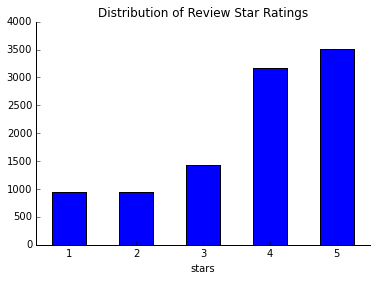

In [81]:
rest_reviews = review_subset
rest_reviews.groupby('stars').stars.count().plot(kind='bar', title='Distribution of Review Star Ratings', grid=False)
plt.setp(plt.xticks()[1], rotation=0)
remove_border()

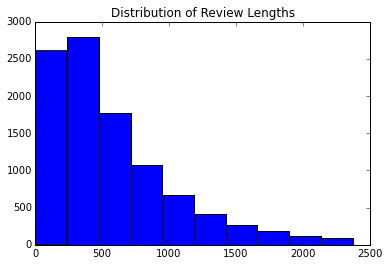

In [82]:
rest_reviews.review_length.hist(grid=False)
plt.title('Distribution of Review Lengths')

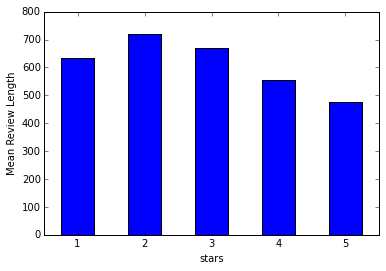

In [83]:
rest_reviews.groupby('stars').review_length.mean().plot(kind='bar', rot=0, grid=False)
plt.ylabel('Mean Review Length')

In [84]:
reviews

,business_id,business_id_x,review_id,date.year,date.month,date.day,stars,text,review_length_x,votes.cool,votes.funny,votes.useful,user_id,business_id_y,review_length_y
0,x5Mv61CnZLohZWxfCVCPTQ,x5Mv61CnZLohZWxfCVCPTQ,4ibY4fPQYM7FBSVPrvrYvg,2010,4,2,4,Not the same Domino's pizza I ate too much of ...,375,0,0,0,t95D1tnWvAOy2sxXnI3GUA,x5Mv61CnZLohZWxfCVCPTQ,375
1,x5Mv61CnZLohZWxfCVCPTQ,x5Mv61CnZLohZWxfCVCPTQ,1JlopVxrAeDNQCRnSHLHrQ,2010,5,3,4,Easy ordering-on-line. Made exactly as I asked...,606,0,0,0,t95D1tnWvAOy2sxXnI3GUA,x5Mv61CnZLohZWxfCVCPTQ,606
2,x5Mv61CnZLohZWxfCVCPTQ,x5Mv61CnZLohZWxfCVCPTQ,9--jL__9efnmXZEm9o0HIw,2010,11,2,5,OK OK... as a Proud Italian I hope my momma do...,1722,5,4,4,9ellV9VrEOPA3vX2pZptSA,x5Mv61CnZLohZWxfCVCPTQ,1722
3,x5Mv61CnZLohZWxfCVCPTQ,x5Mv61CnZLohZWxfCVCPTQ,TOZMdEyuVnLfkLt6rlxxGA,2011,6,17,2,"So Domino's is Domino's, right? You must know...",1457,1,2,2,UpcVov-qPEKJk6FXl3LLHA,x5Mv61CnZLohZWxfCVCPTQ,1457
4,x5Mv61CnZLohZWxfCVCPTQ,x5Mv61CnZLohZWxfCVCPTQ,u-LEH9e8mWPVmolbsXb5rg,2012,9,4,3,never has crushed peppers! \n\nbut the pizza a...,60,0,1,1,NkxFV7RefN87jL_LeVlIPg,x5Mv61CnZLohZWxfCVCPTQ,60
5,x5Mv61CnZLohZWxfCVCPTQ,x5Mv61CnZLohZWxfCVCPTQ,QmMthX1bx6ZHK8PZlvfmSg,2012,9,26,2,"The pizza wasn't horrible, but the deal was a...",198,0,0,2,DBGuQbQy0tPe7Muoawq08Q,x5Mv61CnZLohZWxfCVCPTQ,198
6,x5Mv61CnZLohZWxfCVCPTQ,x5Mv61CnZLohZWxfCVCPTQ,CtRnNJ0JuFDkx_Xu8PAzdw,2013,2,17,1,I normally don't have a problem with Dominos--...,640,1,0,1,L8MoQHZj4cCLKzjeewZvfA,x5Mv61CnZLohZWxfCVCPTQ,640
7,x5Mv61CnZLohZWxfCVCPTQ,x5Mv61CnZLohZWxfCVCPTQ,0m37ZLCausS0gc6TYrcr2A,2013,9,30,2,I don't usually write reviews for chains but t...,314,1,0,3,hn_DclKLzdxABRGGAuqKgg,x5Mv61CnZLohZWxfCVCPTQ,314
8,x5Mv61CnZLohZWxfCVCPTQ,x5Mv61CnZLohZWxfCVCPTQ,3w9IoOVjTTWIZeNG13ZGfA,2014,6,4,5,I have always ordered pizza from dominos and t...,551,0,0,0,lzu5sYkqKRYDHnGGDlHcWw,x5Mv61CnZLohZWxfCVCPTQ,551
9,x5Mv61CnZLohZWxfCVCPTQ,x5Mv61CnZLohZWxfCVCPTQ,WVKPhRNWoj_0aZzYRfWOvQ,2014,9,26,1,Worst customer service ever! The manager Jason...,194,0,0,0,bu2ThJpaNVxXIgclZwpiBw,x5Mv61CnZLohZWxfCVCPTQ,194


In [85]:
reviews.to_pickle('review/reviews300l.pkl')

In [88]:
reviews.business_id.describe()

count                     295005
unique                      5040
top       EC9WB-iVjd28B6R6KIZ8TA
freq                         340
Name: business_id, dtype: object

In [89]:
restaurants.business_id.describe()

count                       5040
unique                      5040
top       u_w4pMQ306HUjAOD_n4GWQ
freq                           1
Name: business_id, dtype: object

In [90]:
restaurants.to_pickle('restaurant/restaurants5k.pkl')